In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#### Domain: Marketing, Retail
##### Background:
- Marketing analytics is the study of data gathered through marketing campaigns in order to analyse patterns between such things as how a campaign contributed to conversions, consumer behavior,regional preferences, creative preferences and much more. The goal of marketing analytics as a practice is to use these patterns and findings to optimize future campaigns based on what was successful.
- Marketing analytics benefits both marketers and consumers. This analysis allows marketers to achieve higher return of investment on marketing investments by understanding what is successful in driving conversions, brand awareness and improvement related to sales, inventory, targeting customers, and other important crucial aspects.

#### Data Description:
1. ID: Customer's unique identifier
2. Year_Birth: Customer's birth year
3. Education: Customer's education level
4. Marital_Status: Customer's marital status
5. Income: Customer's yearly household income
6. Kidhome: Number of children in customer's household
7. Teenhome: Number of teenagers in customer's household
8. Dt_customer: Date of customer's enrollment with the company
9. Recency: Number of days since customer's last purchase
10. MntWines: Amount spent on wine in the last 2 years
11. MntFruits: Amount spent on fruits in the last 2 years
12. MntMeatProducts: Amount spent on meat in the last 2 years
13. MntFishProducts: Amount spent on fish in the last 2 years
14. MntSweetProducts: Amount spent on sweets in the last 2 years
15. MntGoldProds: Amount spent on gold in the last 2 years
16. NumDealsPurchases: Number of purchases made with a discount
17. NumWebPurchases: Number of purchases made through the company's web site
18. NumCatalogPurchases: Number of purchases made using a catalogue
19. NumStorePurchases: Number of purchases made directly in stores
20. NumWebVisitsMonth: Number of visits to company's web site in the last month
21. AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
22. AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
23. AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
24. AcceptedCmp1 1 if customer accepted the offer in the 1st campaign, 0 otherwise
25. AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
26. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
27. Complain: 1 if customer complained in the last 2 years, 0 otherwise
28. Country: Customer's location


### Problem Statement:
- You're a marketing analyst and you've been told by the Senior Marketing Manager that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set in order to understand this problem and propose data-driven solutions. You are required to solve the following questions to generate a report for your management.

### 1. Import necessary libraries and load the dataset and display random 5 samples. Check the info of the data and write your findings. (1 point)

In [ ]:
import numpy as np # for linear algebra
import pandas as pd # for data processing

import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #data visualization #wrapper to matplotlib

#to make figures visible in jupyter notebook cells 
#no need to use plt.show() again and again
%matplotlib inline 

#filtering the warnings while plotting
import warnings
warnings.filterwarnings('ignore')

In [ ]:
mdata = pd.read_csv('../input/markettingdata/marketing_data.csv')
mdata.sample(5)

- It would be better to have the data sorted to keep things under control.
- Let us sort it according to ID which is an obvious choice

In [ ]:
mdata.sort_values('ID',axis=0,ascending=True,inplace=True)
mdata.head()

In [ ]:
mdata.info()

##### Findings:
1. Income attribute with NaN values.
2. All names written in proper format (legible to computer for analysis) except for ' Income' which has a few spaces in front and can be problematic during EDA
3. 5 object types and 23 int types.
4. Many categorical variables, a quite a few of them already hot-encoded
5. Attribute values like Income and Dt_Customers need to be formatted properly
6. Decenet number of records to work with.


### 2. Check the following using an appropriate method and write your findings (1 point)
1. Check how spread out or varied your data set is.
2. Check where the middle 50% of your data lies.
3. Check boundaries for the lower, middle and upper quarters of data.

In [ ]:
mdata.describe().T

- describe() method gives us summary statistics of a dataframe focussing on numerical data unless include='all' is fed in
- many variables in the dataset 'mdata' are hot-encoded as 0/1 which the compiler reads are numerical. their summary stats are useless. So we will focus only on
- 'Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth'
- they are proper numerical variables whose summary stats make sense.

##### interesting findings
- 

### 3. Check for any missing values in the dataset and handle them using an appropriate method. (1 point)

- isna() methods gives a DataFrame of all the attributes in on column, and bool values in the second column
- True (1) stands for Yes, and False(0) stands for no.
- sum() methods sums those bool values gives us a Series of Attributes as keys and sum of NaNs as corresponding values.

In [ ]:
mdata.isna().sum()

- Income attribute has 24 NaNs.
- Before working on them, first I have to deal with two issues:
    1. Removing the unnecesary space before the word 'Income'
    2. Removing the presence of special characters in it, and typecast as float.
- Only then can I impute them properly.
- Thus, I am solving part of the PROBLEM 4. (Note to examiner)

In [ ]:
#getting the column value of Income
mdata.columns[4]

In [ ]:
#Clearly, Income has spaces before and after both
#Removing the unnesary spaces before and after the word 'Income' by renaming it

mdata.rename(columns={' Income ':'Income'},inplace=True)
mdata.columns[4]

- So we have successfully removed the spaces before and after the word Income.
- Now, removing the presence of special characters in Income column rows. And typecasting it as int64.

In [ ]:
mdata['Income'].sample(5)

1. We see 'Income' has a dollar sign and a comma in between which are unnecessary. We will remove them by replacing each of them with '' using replace() method of str object.
2. I will also change it to float even though it contains NaNs. Because Pandas reads NaNs as floats.

In [ ]:
mdata['Income'] = mdata['Income'].str.replace('$','')
mdata['Income'] = mdata['Income'].str.replace(',','').astype(float)
mdata['Income'].sample(5) #checking results

- Now let us analyse the Income column to choose a valid method for imputing 24 missing values.
- Income is an important variable. Even though we have 2240 records, we can't just remove the records corresponding to missing income values. 
- Income of a customer plays a major role in setting his purchasing habits.
- Let's see the summary statistics of 'Income'.

In [ ]:
mdata['Income'].describe().T

In [ ]:
median = mdata['Income'].median()
print(f"Also, Median is {median}")

- 75th percentile value is 68522. Median is 51381.5. Mean is 52247.
- But Max is 666666. So the data seems to be right-skewed. But it is not as clearly, 666666 is an outlier, for Mean and Median are almost same.
- Let's confirm with a histogram

In [ ]:
ax = sns.histplot(mdata['Income'],kde=True,bins=20)

- My assertion was right. There is mild skewness. But it does not rule over the data.
- So we will impute missing values with Median, which conveniently lies betweeb 0 and 100000 - our normal distribution part of the curve. 
- We use fillna() method.

In [ ]:
mdata['Income']=mdata['Income'].fillna(mdata['Income'].median())

#we can check if the NaN values have been removed by :
mdata['Income'].isna().sum()

So, missing values in the dataset have been handled.

### 4. Check for any presence of special characters in any variables. If present, clean/replace and change the datatype of the variable if required. (1 point)

- part of this question was done earlier when I handled Income attribute. Unnecessary signs were removed and it was changed to float.
- let's check each attribute.
- There are around 28 attributes in this dataset, but, as we saw earlier, Jupyter does not display all of them. 
- By default in usual machines, it displays only 20 columns. So I use set_option method of pandas to set the limit to None
- And check one by one for inconsstencies in data.

In [58]:
pd.set_option("display.max_columns", None)
mdata.head(7)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Total_amount,total_purchase
1503,0,1985-01-01,Graduation,Married,70951.0,0,0,2013-05-04,66,239,10,554,254,87,54,1,3,4,9,1,0,0,0,0,0,0,0,SA,37,1198,16
1,1,1961-01-01,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,61,577,17
1956,9,1975-01-01,Master,Single,46098.0,1,1,2012-08-18,86,57,0,27,0,0,36,4,3,2,2,8,0,0,0,0,0,0,0,CA,47,120,7
1311,13,1947-01-01,PhD,Widow,25358.0,0,1,2013-07-22,57,19,0,5,0,0,8,2,1,0,3,6,0,0,0,0,0,0,0,SA,75,32,4
1834,17,1971-01-01,PhD,Married,60491.0,0,1,2013-09-06,81,637,47,237,12,19,76,4,6,11,7,5,0,0,0,0,0,0,0,SP,51,1028,24
2052,20,1965-01-01,2n Cycle,Married,46891.0,0,1,2013-09-01,91,43,12,23,29,15,61,1,2,1,4,4,0,0,0,0,0,0,0,GER,57,183,7
2237,22,1976-01-01,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP,46,309,12


In [ ]:
mdata.info()

- Year_Birth is int. We don't really need to change Year_Birth into datetime format. WE CAN CHANGE IT NOW AND CHANGE BACK. But our task is not to present data in valid formats, but reach conclusion. And manipulation with Int is always better than datetime. Anyway, if we really need it, we will do it.
- Dt_Cutstomer is an int. We will change it to DateTime.
- Rest of the Attribute values seem okay.

In [ ]:
#converting Dt_Customer into a Datetime object with to_datetime function
mdata['Dt_Customer']=pd.to_datetime(mdata['Dt_Customer'], format='%m/%d/%y')

In [ ]:
#checking
mdata.info()

As one can see, the object types have been successfully changed.

### 5. The Marketing Manager wants to know the 'Age' of the customers. Extract the feature age from the given dataset and display the statistical summary of the age? (2 points)

- We know the Customers' Year of Birth in Year_birth attribute. It is int.
- We will use it to produce a new feature 'Age' from 'Year_Birth' column 
- I will use **list comprehension** to iterate through elements of 'Year_Birth' column 

In [ ]:
import datetime
from datetime import date #we use datetime library to get the current date (now)
current_year = date.today().year #current year is assigned to variable 'current_year'

mdata['Age'] = [(current_year-x) for x in mdata['Year_Birth']]
print("Statistical summary of feature 'Age' is:")
mdata['Age'].describe()

#### NOW, we will change the type of data in 'Dt_Customer' Column
- It would have been a case of overcoding dealing with Year_Birth in DateTime form
- Always better to resuse codes.

### Part of Q. 4

In [ ]:
#changing Year_Birth
mdata['Year_Birth']=pd.to_datetime(mdata['Year_Birth'],format='%Y')
print(f"Now the data type of values in Year_Birth is {mdata['Year_Birth'].dtypes}")

### 6. The Marketing manager wants to understand the total amount spent on various products so that we can find what percentage of the amount is spent on which product. (2 points)
    a. Find out the total amount spent by a customer.
    b. Display the Percentage of the amount spent on Wines and other products.

> Total amount spent on various products can be seen in the following attrbutes:
* MntWines: Amount spent on wine in the last 2 years
* MntFruits: Amount spent on fruits in the last 2 years
* MntMeatProducts: Amount spent on meat in the last 2 years
* MntFishProducts: Amount spent on fish in the last 2 years
* MntSweetProducts: Amount spent on sweets in the last 2 years
* MntGoldProds: Amount spent on gold in the last 2 years

- We create a new column named 'Total_amount' by concatenating the above six attributes.

In [ ]:
mdata['Total_amount'] = mdata['MntWines']+ mdata['MntFruits']+mdata['MntMeatProducts']+mdata['MntFishProducts']+mdata['MntSweetProducts']+mdata['MntGoldProds']

#total spent by each customer can be represented in the form of a new tempDf with attributes 'ID' and 'Total_Amount'
print("Total amount spent by each customer is tabulated as follows:\n")
tempDF={'CustomerID':mdata['ID'],'Total Amount':mdata['Total_amount']}
pd.concat(tempDF,axis=1)

- Now onto the second part. We have six products to focus on.
- I would make a new DataFrame and display the percentage of each othe

In [30]:
#We first declare six Series
k=100/mdata['Total_amount']
WinesP = mdata['MntWines']*k
FruitsP = mdata['MntFruits']*k
MeatP = mdata['MntMeatProducts']*k
FishP = mdata['MntFishProducts']*k
SweetsP = mdata['MntSweetProducts']*k
GoldP = mdata['MntGoldProds']*k

ID = mdata['ID'] #also ID for proper reporting

print("Percentage of the amount spent on various products is as follows:")
tempDF = {'CustomerID':mdata['ID'],'Wines':WinesP,'Fruits':FruitsP,'Meat':MeatP,'Sweets':SweetsP,'Gold':GoldP,'Fish':FishP}
pd.concat(tempDF,axis=1)

Percentage of the amount spent on various products is as follows:


,CustomerID,Wines,Fruits,Meat,Sweets,Gold,Fish
1503,0,19.949917,0.834725,46.243740,7.262104,4.507513,21.202003
1,1,80.415945,0.866551,11.091854,0.000000,6.412478,1.213172
1956,9,47.500000,0.000000,22.500000,0.000000,30.000000,0.000000
1311,13,59.375000,0.000000,15.625000,0.000000,25.000000,0.000000
1834,17,61.964981,4.571984,23.054475,1.848249,7.392996,1.167315
...,...,...,...,...,...,...,...
1554,11178,46.875000,6.250000,31.250000,3.125000,12.500000,0.000000
1925,11181,25.000000,12.500000,25.000000,12.500000,12.500000,12.500000
529,11187,2.898551,11.594203,14.492754,20.289855,33.333333,17.391304
1897,11188,16.853933,11.235955,21.348315,19.101124,22.471910,8.988764


### 7. Being an Analyst understands the total number of purchases made through different channels which can help find the percentage these channels contribute. (2 points)
- a. Find out the total purchases done by a customer through different channels.
- b. Display the percentage of the store and other channels’ contribution to the total purchases.

- We have the following data:
    - NumWebPurchases: Number of purchases made through the company's web site
    - NumCatalogPurchases: Number of purchases made using a catalogue
    - NumStorePurchases: Number of purchases made directly in stores
- We use the same steps as in previous question to make a new column total_purchase

In [31]:
mdata['total_purchase'] = mdata['NumWebPurchases'] + mdata['NumCatalogPurchases'] + mdata['NumStorePurchases']
print("The total numbers of purchases done by each customer is as follows:")
tempDF = {'Customer Id': mdata['ID'],'Net Purchase':mdata['total_purchase']}
pd.DataFrame(tempDF)

The total numbers of purchases done by each customer is as follows:


,Customer Id,Net Purchase
1503,0,16
1,1,17
1956,9,7
1311,13,4
1834,17,24
...,...,...
1554,11178,4
1925,11181,0
529,11187,6
1897,11188,6


In [32]:
k=100/mdata['total_purchase']
WebP = mdata['NumWebPurchases']*k
CatalogP = mdata['NumCatalogPurchases']*k
StoreP = mdata['NumStorePurchases']*k

print('Percent of purchase category wise is as follows:')
tempDF={'CustomerID':mdata['ID'],'Web': WebP,'Catalog':CatalogP,'Store':StoreP}
pd.DataFrame(tempDF)

Percent of purchase category wise is as follows:


,CustomerID,Web,Catalog,Store
1503,0,18.750000,25.000000,56.250000
1,1,41.176471,17.647059,41.176471
1956,9,42.857143,28.571429,28.571429
1311,13,25.000000,0.000000,75.000000
1834,17,25.000000,45.833333,29.166667
...,...,...,...,...
1554,11178,25.000000,0.000000,75.000000
1925,11181,NaN,NaN,NaN
529,11187,33.333333,16.666667,50.000000
1897,11188,33.333333,16.666667,50.000000


### 8. The marketing manager wants to understand the performance of different marketing campaigns. Find out which marketing campaign is most successful? Use suitable graphs for visualization. (Hint:- use features like AcceptedCmp for campaign information) (1 point )

- Attributes of concern:
    - AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    - AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    - AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    - AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    - AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    - Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

- There were six marketting campaigns in total. Some customers responded to the first, some to the second... and some to the last, which is represented in the Response attribute.
- These are categorical variables with 1 and 0 indicative of Success and Failure.
- We find success rate of each campaign by calculating the total number of customers getting attracted by each campaign- which is sum of each of the columns.
- Then we represent it all in a piechart.

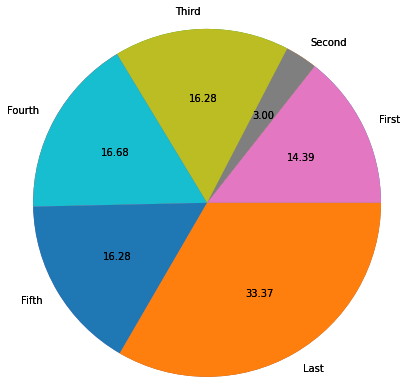

In [38]:
First = mdata['AcceptedCmp1'].sum()
Second = mdata['AcceptedCmp2'].sum()
Third = mdata['AcceptedCmp3'].sum()
Fourth = mdata['AcceptedCmp4'].sum()
Fifth = mdata['AcceptedCmp5'].sum()
Last = mdata['Response'].sum()

#let us draw a piechart to visualize the results

data = [First,Second,Third,Fourth,Fifth,Last]
labels=['First','Second','Third','Fourth','Fifth','Last']
ax = plt.pie(data,labels=labels,radius=2,autopct='%.2f')
#let us draw a piechart to visualize the results

data = [First,Second,Third,Fourth,Fifth,Last]
labels=['First','Second','Third','Fourth','Fifth','Last']
ax = plt.pie(data,labels=labels,radius=2,autopct='%.2f')

Clearly the last campaign is the most successful hoarding as much as **33.37 percent** of whole conversion. We expected the last campaign to be more successful as it also reaps the benefts of previous campaigns")

### 9. The marketing manager wants to understand which products are performing the best and which are performing the least in terms of revenue. Being an analyst, analyse the data and plot a suitable graph to display a report on revenue generated by different products. (2 points)

Revenue generated by different products can be visualized in the following chart:


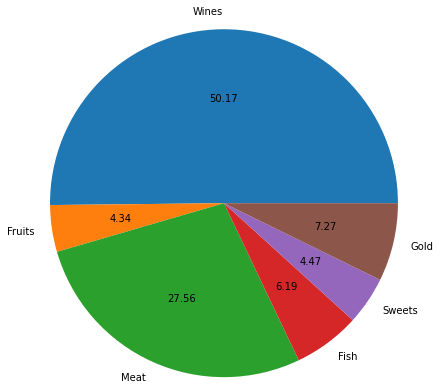

In [36]:
WinesR = mdata['MntWines'].sum()
FruitsR = mdata['MntFruits'].sum()
MeatR = mdata['MntMeatProducts'].sum()
FishR = mdata['MntFishProducts'].sum()
SweetsR = mdata['MntSweetProducts'].sum()
GoldR = mdata['MntGoldProds'].sum()

data=[WinesR,FruitsR,MeatR,FishR,SweetsR,GoldR]
labels= ['Wines','Fruits','Meat','Fish','Sweets','Gold']
print("Revenue generated by different products can be visualized in the following chart:")
ax = plt.pie(data,autopct='%.2f',radius=2,labels=labels)

- Clearly **Wines** are performing the best in generating revenue with a 50% share
- And **Fruits** are performing the least with 4.34 percent of share.

### 10. The team wants to understand if there’s any pattern between the age of customers and the last campaign acceptance rate. Plot a suitable graph to visualize the distribution of the age with respect to customers who accepted the last campaign. (1 point)

- We plot a boxplot in seaborn between 'Age' and 'Response'. 
- Response is a categorical variable with only two possible options.
- The graph will show the spread of AGE with Response = 0, that is NO; and Response=1, that is YES.

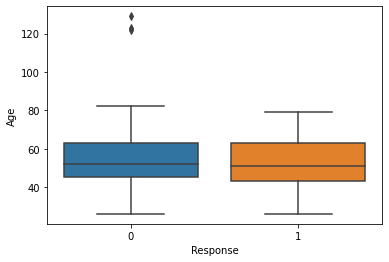

In [39]:
ax = sns.boxplot(data=mdata,y=mdata['Age'],x=mdata['Response'])

- There does not seem to be a pattern between the Age of customers and their rate of acceptance. Both boxplots have similar medians and similar spread with almost same quantile ranges.
- One interesting observation is the presence of customers as old as 140, which cannot be statistically negated.

### 11. The Chief Marketing specialist wants to visually see which Country has the most number of customers who accepted the last campaign. What is your approach? (1 point)

- First we subset mdata using loc operator with conditional on rows being Response==1.
- Then, we group the data (countaining Country and Response) by 'Country' and aggregate it with sum() function. 
- We use reset_index() method to reset indices 
- Now we visualize it with a barplot.

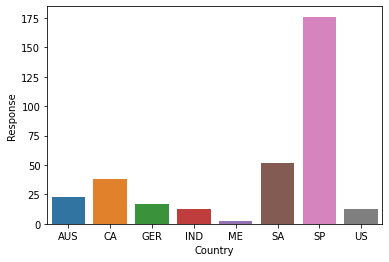

In [40]:
data = mdata.loc[mdata['Response']==1,['Country','Response']]
data

ByCountry = data.groupby('Country').sum().reset_index()
ax = sns.barplot(data=ByCountry,x='Country',y='Response')

Clearly the country **SP** has the most number of customers who accepted the last campaign.

### 12. Analyse visually and write your inferences about the relationship between the following:(1 point )
- i) Total amount spent Vs Dependents. (Dependents=['Kidhome']+['Teenhome'])

- I use regplot.

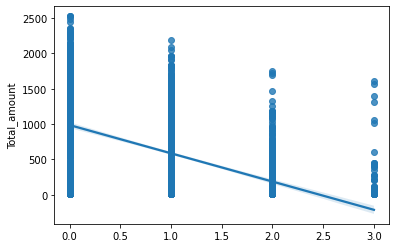

In [41]:
Dependents = mdata['Kidhome']+mdata['Teenhome'] #numerical data
ax = sns.regplot(x=Dependents,y=mdata['Total_amount'])

- But this is not a very nice chart. It deals with number of dependents as continuous
- And there are only four possible values of 'Dependents'. 
- I would rather chart a bargraph.

[Text(0.5, 0, 'Number of Dependents')]

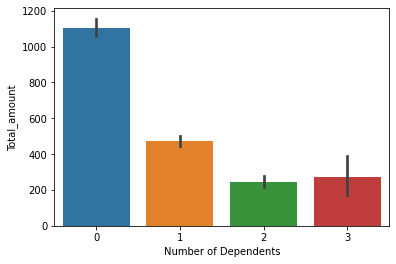

In [56]:
ax = sns.barplot(x=Dependents,y=mdata['Total_amount'])
ax.set(xlabel='Number of Dependents')

- ii) Total Purchases Vs Dependents.

[Text(0.5, 0, 'Number of Dependents')]

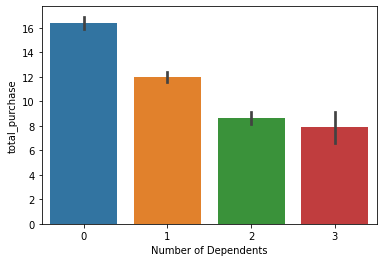

In [57]:
ax=sns.barplot(x=Dependents,y=mdata['total_purchase'])
ax.set(xlabel='Number of Dependents')

#### inferences:
- Customers with no dependents at home spend most.
- This does not seem surprising looking at the products which they are buying and the trend of buy wines a lot.
- In households with depedents, consumption of other goods like Tuition fees, Wardrobe etc increases.
- There is a slight increment in total amount spent with dependents==3, because in that case, one can safely assume a few of them are TEEN and hence almost adults.
- The trend of total_purchase is almost the same, and for the same reasons. The godds in concern are most freely purchased in households with no dependents given the financial constraints of bringing them up.
- The spread of data (variance) in case of both with customers (dependents==3) is most. It can be explained that with dependents, their choices begin to dominate the purchase/expenditure, leading to a greater variance.

### 13.Perform Correlation Analysis and write your key inferences. (Hint:- visualise using an appropriate plot) (1 point)

In [60]:
#correlation analysis makes sense only in between Numerical data
#extracting all numerical Attributes in a dummy dataframe
dummy=mdata.loc[:,['Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Age','Total_amount','total_purchase']]

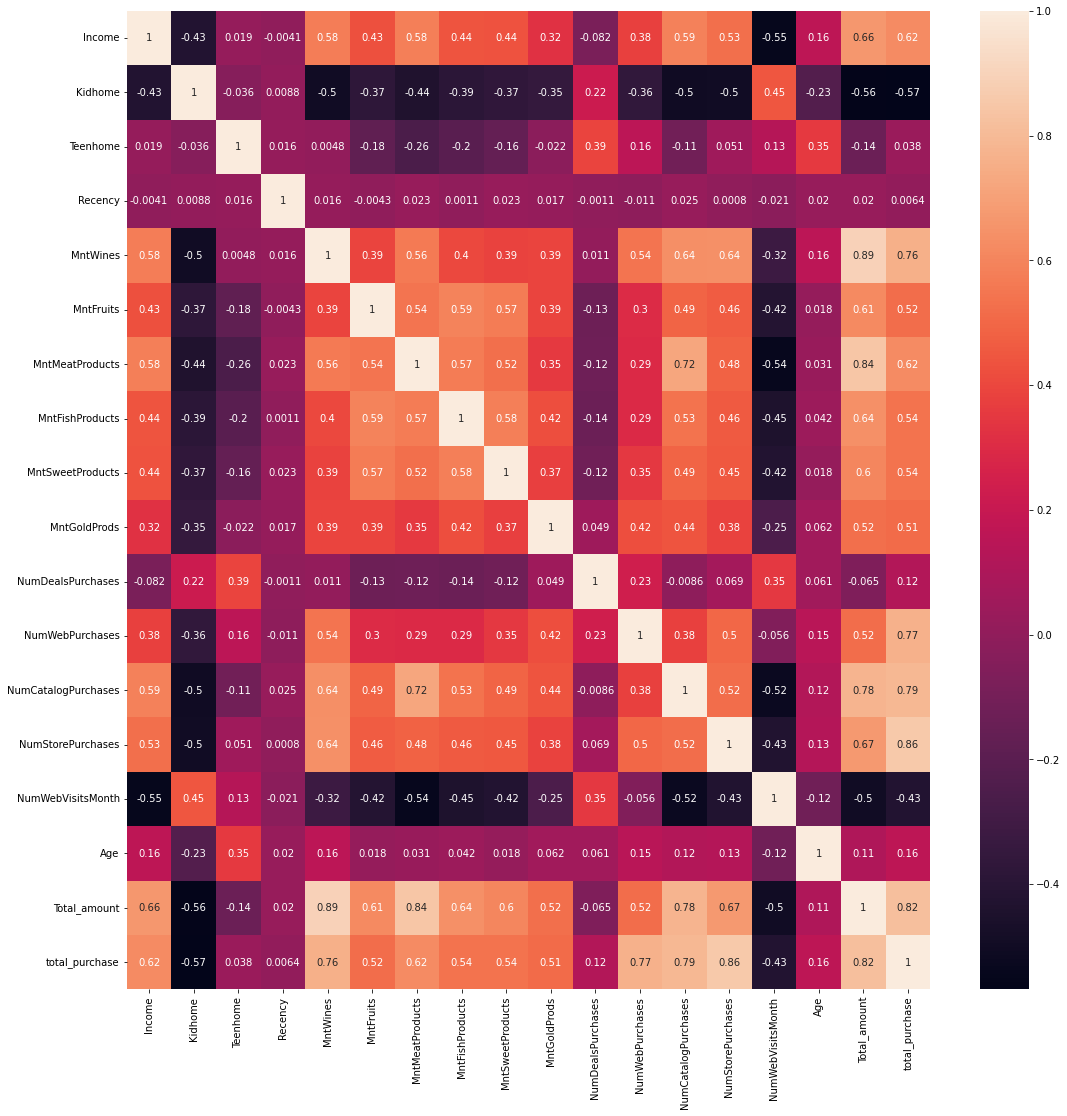

In [61]:
#making correlation matrix of the above dummy dataset using .corr() method
#and feeding the correlation matrix into a heatmap

ax,figure=plt.subplots(figsize=(18,18))
ax=sns.heatmap(dummy.corr(),annot=True,)

In [63]:
#I prefer numbers over colors, so I will also use correlation matrix in its raw form to draw inferences
dummy.corr()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Total_amount,total_purchase
Income,1.000000,-0.425326,0.018965,-0.004061,0.576903,0.428791,0.577805,0.437564,0.436131,0.321938,-0.082315,0.380554,0.586826,0.526600,-0.549785,0.160899,0.664775,0.622386
Kidhome,-0.425326,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,0.221798,-0.361647,-0.502237,-0.499683,0.447846,-0.230176,-0.556669,-0.568637
Teenhome,0.018965,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,0.387741,0.155500,-0.110769,0.050695,0.134884,0.352111,-0.138384,0.037902
Recency,-0.004061,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,-0.001098,-0.010726,0.025110,0.000799,-0.021445,0.019871,0.020433,0.006410
MntWines,0.576903,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.010940,0.542265,0.635226,0.642100,-0.320653,0.157773,0.891839,0.756490
MntFruits,0.428791,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,-0.132114,0.296735,0.487917,0.461758,-0.418383,0.017917,0.614229,0.520686
MntMeatProducts,0.577805,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,-0.122415,0.293761,0.723827,0.479659,-0.539470,0.030872,0.842965,0.623315
MntFishProducts,0.437564,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,-0.139361,0.293681,0.534478,0.459855,-0.446003,0.041625,0.642818,0.537538
MntSweetProducts,0.436131,-0.370673,-0.162475,0.022670,0.386581,0.567164,0.523846,0.579870,1.000000,0.369724,-0.120100,0.348544,0.490924,0.448756,-0.423294,0.018133,0.603016,0.536019
MntGoldProds,0.321938,-0.349595,-0.021725,0.016693,0.387516,0.392995,0.350609,0.422875,0.369724,1.000000,0.049085,0.421836,0.437697,0.381678,-0.250719,0.061818,0.524262,0.512427


#### Inferences:
- Income is greatly correlated to toal purchase as well as total amount spent
- 

### 14. Understand the Education background of the customers who complained in the last 2 years. State the Education background of the customers who have registered the most number of complaints. (Hint:- you can use appropriate) (1 point)

[Text(0.5, 0, 'Education Level'), Text(0, 0.5, 'Number of Complaints')]

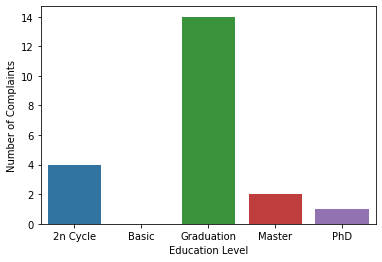

In [65]:
ComplaintsEd = mdata.loc[:,['Education','Complain']]
ComplaintsEd = ComplaintsEd.groupby('Education').sum().reset_index()
ax = sns.barplot(data=ComplaintsEd,x='Education',y='Complain')
ax.set(xlabel='Education Level',ylabel='Number of Complaints')

As is clear from the barplot, those with **Graduation background** filed the most number of complaints.

### 15. Use features 'Total_amount_spent', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts' and, 'MntGoldProds' in x-axis and y-axis and plot the following plots. (2 points)
- i) Plot a pairplot with hue as Response.
- ii) Plot a pairplot with hue as Education.
- iii) Plot a pairplot with hue as Marital Status and write your key observations.

i) Plot a pairplot with hue as Response.

In [ ]:
ax = sns.pairplot(data=mdata, vars=['Total_amount','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'], hue='Response')

ii) Plot a pairplot with hue as Education.

In [ ]:
ax = sns.pairplot(data=mdata, vars=['Total_amount','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'], hue='Education')

iii) Plot a pairplot with hue as Marital Status and write your key observations.

In [ ]:
ax = sns.pairplot(data=mdata, vars=['Total_amount','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'], hue='Marital_Status')

#### Key Observations:
- 

### 